Code to demonstrate tetrad_plus capabilities.

In [1]:
from fastcda import FastCDA
from dgraph_flex import DgraphFlex
import semopy
import pprint as pp

In [2]:
# create  an instance of FastCDA
tp = FastCDA()

# set the data and knowledge files
data_file = 'fastcda/data/boston_data_raw.csv'
knowledge_file = 'fastcda/data/boston_prior.txt'


In [3]:
# read in the data
df = tp.read_csv(data_file)
df

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9
0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...
636,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,8.50,7.583333,33.0,13.0,17.0,3.0
639,3.0,9.00,8.166667,31.0,12.0,19.0,2.0


In [4]:
# add the lags, with a suffix of '_lag'
df_lag = tp.add_lag_columns(df, lag_stub='_lag')
df_lag

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,1.0,8.50,7.166667,39.0,12.0,15.0,0.0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.75,8.083333,39.0,12.0,12.0,0.0,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.25,6.666667,38.0,13.0,15.0,0.0,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,0.0,8.25,7.416667,37.0,12.0,16.0,0.0,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,8.75,7.916667,29.0,12.0,17.0,3.0,6.0,7.00,6.166667,31.0,15.0,18.0,3.0
636,4.0,8.50,7.666667,31.0,12.0,17.0,4.0,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,3.0,8.50,7.583333,33.0,13.0,17.0,3.0,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,9.00,8.166667,31.0,12.0,19.0,2.0,3.0,8.50,7.583333,33.0,13.0,17.0,3.0


In [5]:
# standardize the data
df_lag_std = tp.standardize_df_cols(df_lag)
df_lag_std

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,-0.720086,0.945596,0.714807,1.403653,-0.442144,-1.025409,-0.961531,-0.045027,0.019757,-0.338939,1.808615,-0.237832,-1.969207,-0.960600
1,-0.048041,-0.349371,-0.463029,1.300809,-0.442144,-0.866815,-0.961531,-0.719118,0.944940,0.714883,1.398222,-0.442144,-1.020311,-0.960600
2,-0.048041,-0.164376,0.218876,1.300809,-0.442144,-1.342597,-0.961531,-0.045027,-0.350317,-0.462918,1.295624,-0.442144,-0.862161,-0.960600
3,-0.048041,-0.534367,-0.834977,1.197966,-0.237832,-0.866815,-0.961531,-0.045027,-0.165280,0.218966,1.295624,-0.442144,-1.336610,-0.960600
4,-0.720086,-0.534367,-0.277055,1.095122,-0.442144,-0.708221,-0.961531,-0.045027,-0.535353,-0.834856,1.193025,-0.237832,-0.862161,-0.960600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.968095,-0.164376,0.094893,0.272375,-0.442144,-0.549627,0.053947,3.325425,-1.460537,-1.206793,0.474838,0.170792,-0.387713,0.054453
636,1.968095,-0.349371,-0.091081,0.478062,-0.442144,-0.549627,0.392440,1.977244,-0.165280,0.094987,0.269641,-0.442144,-0.545863,0.054453
637,1.296050,-0.349371,-0.153072,0.683748,-0.237832,-0.549627,0.053947,1.977244,-0.350317,-0.090981,0.474838,-0.442144,-0.545863,0.392805
638,1.296050,0.020619,0.280867,0.478062,-0.442144,-0.232439,-0.284546,1.303154,-0.350317,-0.152971,0.680034,-0.237832,-0.545863,0.054453


In [6]:
# read the prior file for testing
prior_lines = tp.read_prior_file(knowledge_file)
# extract knowledge from the prior lines
knowledge = tp.extract_knowledge(prior_lines)

knowledge

{'addtemporal': {0: ['alcohol_bev_lag',
   'TIB_lag',
   'TST_lag',
   'PANAS_PA_lag',
   'PANAS_NA_lag',
   'worry_scale_lag',
   'PHQ9_lag'],
  1: ['alcohol_bev',
   'TIB',
   'TST',
   'PANAS_PA',
   'PANAS_NA',
   'worry_scale',
   'PHQ9']}}

In [7]:
# Run the search
searchResult, _= tp.run_model_search( df_lag_std, 
                                    model='gfci', 
                                    knowledge=knowledge, 
                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                    test={'fisher_z': {'alpha': .01}})

searchResult

{'edges': ['TIB_lag o-> TST_lag',
  'worry_scale --> TST',
  'PHQ9_lag <-> PANAS_NA_lag',
  'worry_scale_lag --> worry_scale',
  'PANAS_NA_lag --> worry_scale_lag',
  'worry_scale_lag --> PANAS_PA_lag',
  'TIB <-> TST',
  'PANAS_NA --> worry_scale',
  'PANAS_NA <-> PANAS_NA_lag',
  'PANAS_PA_lag --> PHQ9_lag',
  'worry_scale_lag --> alcohol_bev_lag',
  'PHQ9 <-> PANAS_NA_lag',
  'TIB --> PANAS_NA',
  'alcohol_bev_lag --> alcohol_bev',
  'PANAS_PA <-> PHQ9',
  'worry_scale_lag --> TST_lag',
  'worry_scale --> PANAS_PA',
  'PHQ9_lag --> PHQ9',
  'PHQ9 --> PANAS_NA',
  'PANAS_PA_lag --> PANAS_PA',
  'TIB_lag o-> TIB',
  'TST_lag --> TST'],
 'cda_output': 'Graph Nodes:
 alcohol_bev;TIB;TST;PANAS_PA;PANAS_NA;worry_scale;PHQ9;alcohol_bev_lag;TIB_lag;TST_lag;PANAS_PA_lag;PANAS_NA_lag;worry_scale_lag;PHQ9_lag
 
 Graph Edges:
 1. PANAS_NA <-> PANAS_NA_lag
 2. PANAS_NA --> worry_scale
 3. PANAS_NA_lag --> worry_scale_lag
 4. PANAS_PA <-> PHQ9
 5. PANAS_PA_lag --> PANAS_PA
 6. PANAS_PA_lag --> PH

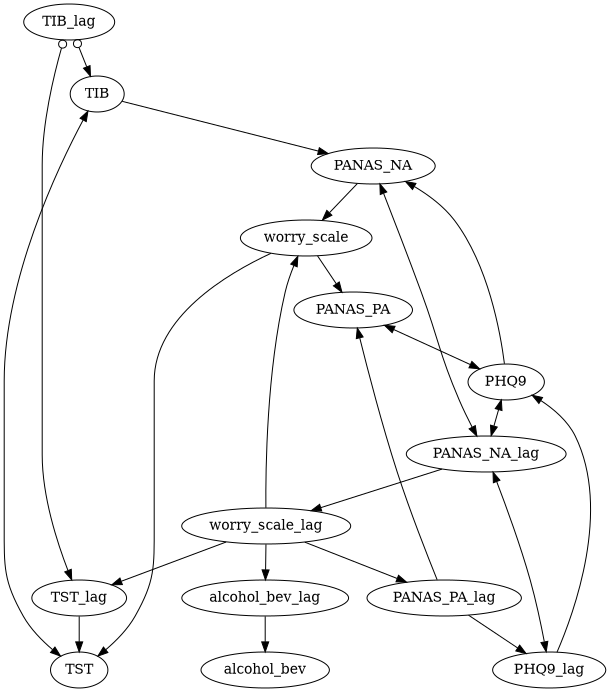

In [8]:
# show the raw graph
obj = DgraphFlex()
# create a list of the edges
edges = list(searchResult['edges'])
# add the edges to the graph object
obj.add_edges(edges)
# show the graph
obj.show_graph()

In [9]:
# run the sem

# convert the edges from searchResult to lavaan format
lavaan_model = tp.edges_to_lavaan(edges)
lavaan_model

'TST_lag ~ TIB_lag\nTST ~ worry_scale\nworry_scale ~ worry_scale_lag\nworry_scale_lag ~ PANAS_NA_lag\nPANAS_PA_lag ~ worry_scale_lag\nworry_scale ~ PANAS_NA\nPHQ9_lag ~ PANAS_PA_lag\nalcohol_bev_lag ~ worry_scale_lag\nPANAS_NA ~ TIB\nalcohol_bev ~ alcohol_bev_lag\nTST_lag ~ worry_scale_lag\nPANAS_PA ~ worry_scale\nPHQ9 ~ PHQ9_lag\nPANAS_NA ~ PHQ9\nPANAS_PA ~ PANAS_PA_lag\nTIB ~ TIB_lag\nTST ~ TST_lag\n'

In [10]:
# run semopy with the lavaan model and the data
sem_results = tp.run_semopy(lavaan_model, df_lag_std)
# the main output we are interested in is the parameter estimates
sem_results['estimates']

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,TST_lag,~,TIB_lag,0.772753,0.024717,31.264564,0.000000e+00
1,TST_lag,~,worry_scale_lag,0.127595,0.024717,5.162206,2.440560e-07
2,worry_scale,~,worry_scale_lag,0.813082,0.020299,40.055897,0.000000e+00
3,worry_scale,~,PANAS_NA,-0.105783,0.020301,-5.210741,1.880884e-07
4,worry_scale_lag,~,PANAS_NA_lag,-0.423252,0.035812,-11.818585,0.000000e+00
5,PANAS_PA_lag,~,worry_scale_lag,0.367615,0.036761,10.000129,0.000000e+00
6,PHQ9_lag,~,PANAS_PA_lag,-0.478610,0.034707,-13.790130,0.000000e+00
7,alcohol_bev_lag,~,worry_scale_lag,0.151137,0.039076,3.867740,1.098487e-04
8,PANAS_NA,~,TIB,-0.126198,0.026271,-4.803788,1.556915e-06
9,PANAS_NA,~,PHQ9,0.735885,0.026273,28.008687,0.000000e+00


In [11]:
# save the graph generated by semopy
# plot into png
png_path = 'boston_data.png'
g = semopy.semplot(sem_results['model'], png_path,  plot_covs = True)


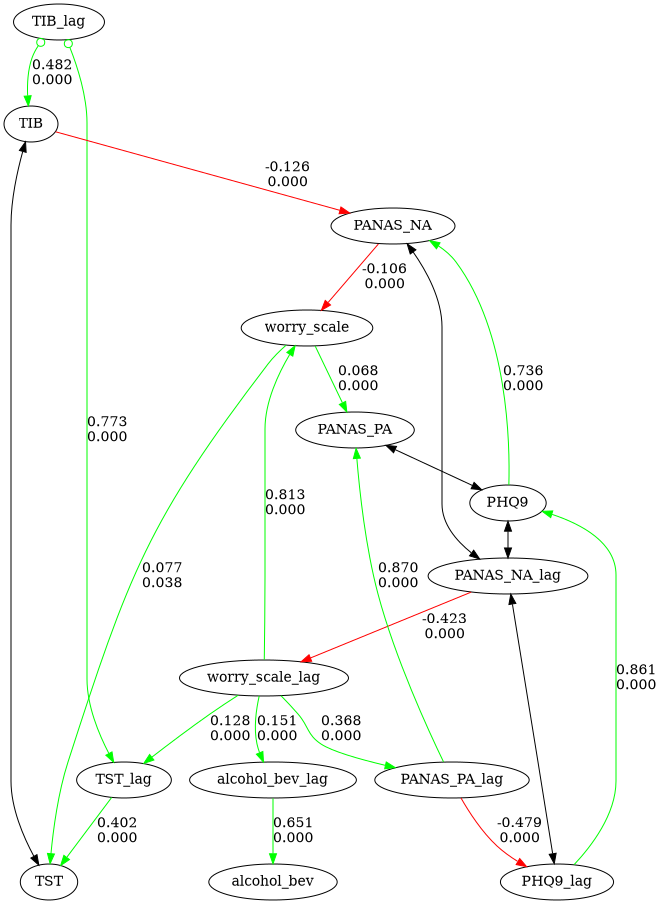

In [12]:
# add the sem results to our graph object

tp.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.save_graph('boston_graph_single_sem')

# show the graph
obj.show_graph()

In the next section, we perform the stability analysis.

We do 100 runs with a subsample 90% without substitution.

We keep edges that are present at least 75%.

stable_edges contains the edges that were found 75% of the time.

In [13]:
# run the stability search
stable_edges, sorted_edges, sorted_edges_raw, run_results = tp.run_stability_search(
                                        df, 
                                        model='gfci',
                                        knowledge=knowledge,
                                        score={'sem_bic': {'penalty_discount': 1.0}},
                                        test={'fisher_z': {'alpha': .01}},
                                        runs=100,
                                        min_fraction=0.75,
                                        subsample_fraction=0.9,
                                        lag_stub = '_lag',
                                        save_file='stability_search_results.json',)

stable_edges

Running stability search with 100 runs:   0%|          | 0/100 [00:00<?, ?run/s]


Search complete!
Results saved to stability_search_results.json


['PANAS_NA --> worry_scale',
 'PANAS_NA_lag --> worry_scale_lag',
 'worry_scale --> PANAS_PA',
 'worry_scale --> TST',
 'worry_scale_lag --> PANAS_PA_lag',
 'worry_scale_lag --> worry_scale',
 'PANAS_PA_lag --> PANAS_PA',
 'PHQ9_lag --> PHQ9',
 'TIB_lag o-> TIB',
 'TST_lag --> TST',
 'alcohol_bev_lag --> alcohol_bev',
 'PANAS_PA <-> PHQ9',
 'TIB <-> TST']

In [14]:
# lets show the sorted edges
sorted_edges

{'PANAS_NA --> PHQ9': 0.33,
 'PANAS_NA --> TIB': 0.03,
 'PANAS_NA --> worry_scale': 1.0,
 'PANAS_NA <-> PANAS_NA_lag': 0.66,
 'PANAS_NA <-> PHQ9': 0.07,
 'PANAS_NA <-> PHQ9_lag': 0.01,
 'PANAS_NA o-> PHQ9': 0.13,
 'PANAS_NA_lag --- worry_scale_lag': 0.04,
 'PANAS_NA_lag --> PANAS_NA': 0.19,
 'PANAS_NA_lag --> PHQ9': 0.03,
 'PANAS_NA_lag --> PHQ9_lag': 0.03,
 'PANAS_NA_lag --> worry_scale_lag': 0.81,
 'PANAS_NA_lag <-> PHQ9_lag': 0.16,
 'PANAS_NA_lag o-> PANAS_NA': 0.15,
 'PANAS_NA_lag o-> PHQ9': 0.11,
 'PANAS_NA_lag o-o PHQ9_lag': 0.12,
 'PANAS_NA_lag o-o worry_scale_lag': 0.14,
 'PANAS_PA --> TST': 0.01,
 'PANAS_PA <-> PHQ9': 1.0,
 'PANAS_PA_lag --> PANAS_PA': 0.96,
 'PANAS_PA_lag --> PHQ9_lag': 0.36,
 'PANAS_PA_lag --> TST_lag': 0.05,
 'PANAS_PA_lag o-> PANAS_PA': 0.04,
 'PANAS_PA_lag o-> PHQ9_lag': 0.09,
 'PANAS_PA_lag o-> worry_scale_lag': 0.09,
 'PANAS_PA_lag o-o TST_lag': 0.01,
 'PHQ9 --> PANAS_NA': 0.38,
 'PHQ9 --> TST': 0.02,
 'PHQ9 <-> PANAS_NA': 0.09,
 'PHQ9 <-> PANAS_NA_lag'

Let's create a graph of these edges

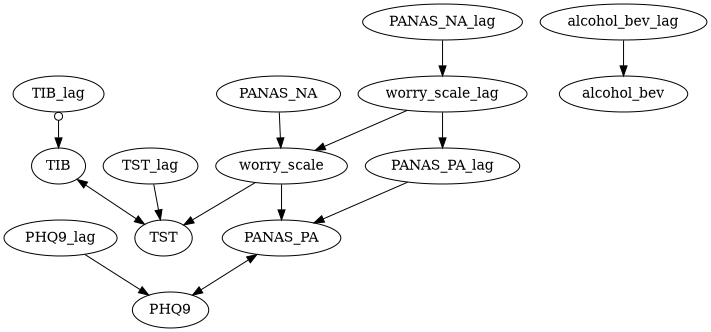

In [15]:
obj = DgraphFlex()
obj.add_edges(stable_edges)
# show the graph
obj.show_graph()

Now that we have the edges, lets run the sem and show the causal graph.

In [ ]:
lavaan_model = tp.edges_to_lavaan(stable_edges)

# run semopy, using the lagged and standardized data
sem_results = tp.run_semopy(lavaan_model, df_lag_std)
# add the semopy results to the graph object
tp.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.save_graph('boston_graph_stable_sem')
# show the graph
obj.show_graph()

TypeError: DgraphFlex.save_graph() got an unexpected keyword argument 'plot_name'

The prior graph was using a threshold of 0.75 for an edge to be included in the graph.  Let's change this to .9.

In [ ]:
# Let's get a new set of edges based on the min_fractio of 0.9
selected_edges = tp.select_edges(sorted_edges, min_fraction=0.7)

selected_edges

In [ ]:
# run the sem and create a new graph
obj = DgraphFlex()
obj.add_edges(selected_edges)

# run the sem
lavaan_model = tp.edges_to_lavaan(selected_edges)
sem_results = tp.run_semopy(lavaan_model, df_lag_std)
# add the semopy results to the graph object
tp.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.show_graph()